<a href="https://colab.research.google.com/github/sezaionurlu/Association-Rule-Based-Recommender-System/blob/main/Association_Rule_Based_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**İş Problemi**

Türkiye’nin en büyük online hizmet platformu olan Armut, hizmet verenler ile hizmet almak isteyenleri buluşturmaktadır.
Bilgisayarın veya akıllı telefonunun üzerinden birkaç dokunuşla temizlik, tadilat, nakliyat gibi hizmetlere kolayca
ulaşılmasını sağlamaktadır.
Hizmet alan kullanıcıları ve bu kullanıcıların almış oldukları servis ve kategorileri içeren veri setini kullanarak Association
Rule Learning ile ürün tavsiye sistemi oluşturulmak istenmektedir.

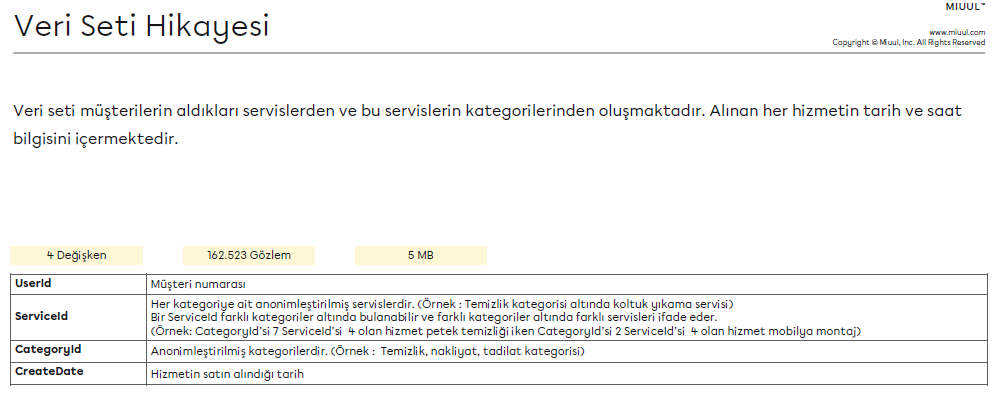

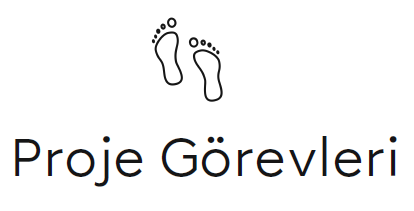

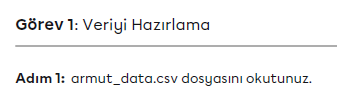

In [ ]:
!pip install mlxtend
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
# çıktının tek bir satırda olmasını sağlar.
pd.set_option('display.expand_frame_repr', False)
from mlxtend.frequent_patterns import apriori, association_rules

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_ = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/Ödevler/5/armut_data.csv')

In [ ]:
df = df_.copy()
df.head()

,UserId,ServiceId,CategoryId,CreateDate
0,25446,4,5,2017-08-06 16:11:00
1,22948,48,5,2017-08-06 16:12:00
2,10618,0,8,2017-08-06 16:13:00
3,7256,9,4,2017-08-06 16:14:00
4,25446,48,5,2017-08-06 16:16:00


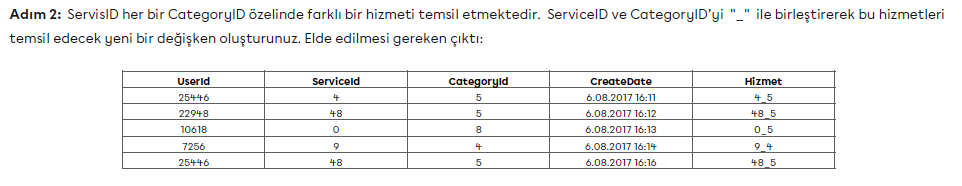

In [ ]:
df['ServiceId'][0].astype(str) + '_' + df['CategoryId'][0].astype(str)

'4_5'

In [ ]:
df['Hizmet'] = df['ServiceId'].astype(str) + '_' + df['CategoryId'].astype(str)
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Hizmet
0,25446,4,5,2017-08-06 16:11:00,4_5
1,22948,48,5,2017-08-06 16:12:00,48_5
2,10618,0,8,2017-08-06 16:13:00,0_8
3,7256,9,4,2017-08-06 16:14:00,9_4
4,25446,48,5,2017-08-06 16:16:00,48_5


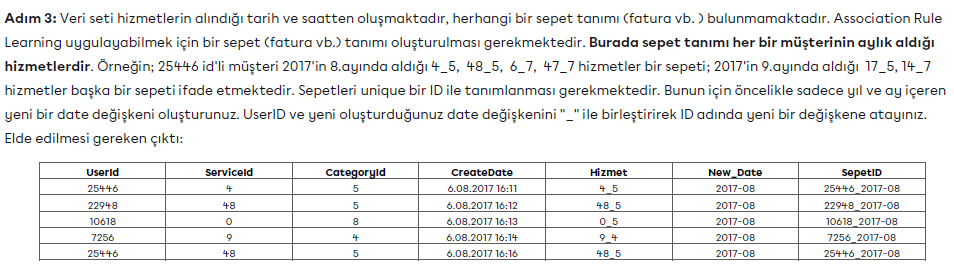

In [ ]:
df['CreateDate'][0]

'2017-08-06 16:11:00'

In [ ]:
df['CreateDate'][0][:4]

'2017'

In [ ]:
df['CreateDate'][0][5:7]

'08'

In [ ]:
for i in  range(0, len(df)):
  
  df['New_Date'][i] = df['CreateDate'][i][:4] + '-' + df['CreateDate'][i][5:7]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,UserId,ServiceId,CategoryId,CreateDate,Hizmet,New_Date
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08


In [ ]:
df['New_Date'].value_counts()

2018-03    15903
2017-12    15282
2018-01    14948
2018-05    14598
2018-02    13907
2018-04    13872
2017-09    13664
2017-11    13446
2018-06    13321
2017-10    12380
2017-08    10960
2018-07     9547
2018-08      695
Name: New_Date, dtype: int64

In [ ]:
df['New_Date'] = df['CreateDate'].str[:4] + '-' + df['CreateDate'].str[5:7]
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Hizmet,New_Date
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08


In [ ]:
df.sort_values('New_Date')

,UserId,ServiceId,CategoryId,CreateDate,Hizmet,New_Date,SepetID
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08,25446_2018-08
7302,25300,32,4,2017-08-24 02:54:00,32_4,2017-08,25300_2018-08
7303,12094,48,5,2017-08-24 02:54:00,48_5,2017-08,12094_2018-08
7304,7339,38,4,2017-08-24 02:57:00,38_4,2017-08,7339_2018-08
7305,8835,41,3,2017-08-24 02:58:00,41_3,2017-08,8835_2018-08
...,...,...,...,...,...,...,...
162061,10744,47,7,2018-08-02 09:38:00,47_7,2018-08,10744_2018-08
162062,15211,2,0,2018-08-02 09:58:00,2_0,2018-08,15211_2018-08
162063,9968,30,2,2018-08-02 10:17:00,30_2,2018-08,9968_2018-08
162055,5095,25,0,2018-08-02 08:56:00,25_0,2018-08,5095_2018-08


In [ ]:
from datetime import datetime

In [ ]:
datetime.strptime(df['CreateDate'][0], '%Y-%m-%d %H:%M:%S')

datetime.datetime(2017, 8, 6, 16, 11)

In [ ]:
df['CreateDate'] = pd.to_datetime(df['CreateDate'])
df['New_Date_2'] = df['CreateDate'].dt.strftime('%Y-%m')
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Hizmet,New_Date,New_Date_2
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08,2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08,2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08,2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08,2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08,2017-08


In [ ]:
datetime.strptime(df['CreateDate'][0], '%Y-%m-%d %H:%M:%S').year

2017

In [ ]:
datetime.strptime(df['CreateDate'][0], '%Y-%m-%d %H:%M:%S').month

8

In [ ]:
df['SepetID'] = df['UserId'].astype(str) + '_' + df['New_Date']
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Hizmet,New_Date,New_Date_2,SepetID
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08,2017-08,25446_2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08,2017-08,22948_2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08,2017-08,10618_2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08,2017-08,7256_2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08,2017-08,25446_2017-08


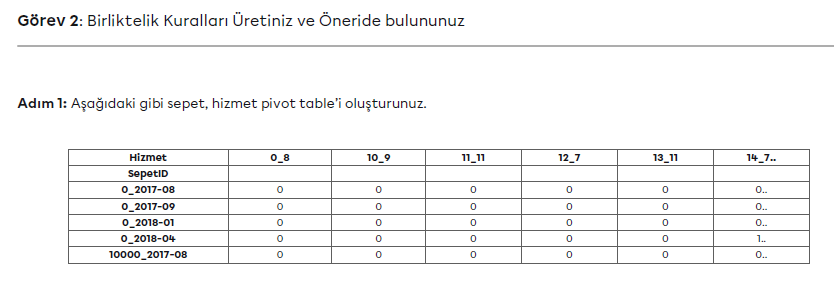

In [ ]:
df_pvt = df.pivot_table(index = 'SepetID', columns = 'Hizmet', values = 'New_Date', aggfunc= 'count').sort_index().fillna(0)

In [ ]:
df_pvt.iloc[0:5,0:6]

Hizmet,0_8,10_9,11_11,12_7,13_11,14_7
SepetID,,,,,,
0_2017-08,0.0,0.0,0.0,0.0,0.0,0.0
0_2017-09,0.0,0.0,0.0,0.0,0.0,0.0
0_2018-01,0.0,0.0,0.0,0.0,0.0,0.0
0_2018-04,0.0,0.0,0.0,0.0,0.0,1.0
10000_2017-08,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_pvt = df_pvt.applymap(lambda x: 1 if x>0 else 0)

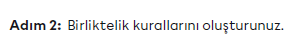

In [ ]:
frequent_itemsets = apriori(df_pvt,
                            min_support=0.01,
                            use_colnames=True)

In [ ]:
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
8,0.238121,(18_4)
19,0.130286,(2_0)
5,0.120963,(15_1)
39,0.067762,(49_1)
28,0.066568,(38_4)
3,0.056627,(13_11)
12,0.047515,(22_0)
9,0.045563,(19_6)
15,0.042895,(25_0)
7,0.041533,(17_5)


In [ ]:
rules = association_rules(frequent_itemsets,
                          metric="support",
                          min_threshold=0.01)

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_0),(13_11),0.130286,0.056627,0.012819,0.098394,1.737574,0.005442,1.046325
1,(13_11),(2_0),0.056627,0.130286,0.012819,0.226382,1.737574,0.005442,1.124216
2,(15_1),(2_0),0.120963,0.130286,0.033951,0.280673,2.154278,0.018191,1.209066
3,(2_0),(15_1),0.130286,0.120963,0.033951,0.260588,2.154278,0.018191,1.188833
4,(33_4),(15_1),0.027310,0.120963,0.011233,0.411311,3.400299,0.007929,1.493211
5,(15_1),(33_4),0.120963,0.027310,0.011233,0.092861,3.400299,0.007929,1.072262
6,(15_1),(38_4),0.120963,0.066568,0.011177,0.092397,1.388001,0.003124,1.028458
7,(38_4),(15_1),0.066568,0.120963,0.011177,0.167897,1.388001,0.003124,1.056404
8,(15_1),(49_1),0.120963,0.067762,0.010011,0.082763,1.221375,0.001815,1.016354
9,(49_1),(15_1),0.067762,0.120963,0.010011,0.147741,1.221375,0.001815,1.031420


In [ ]:
rules[(rules["support"]>0.01) & (rules["confidence"]>0.1) & (rules["lift"]>5)]. \
sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(25_0),(22_0),0.042895,0.047515,0.01112,0.259247,5.456141,0.009082,1.285834
11,(22_0),(25_0),0.047515,0.042895,0.01112,0.234043,5.456141,0.009082,1.249553


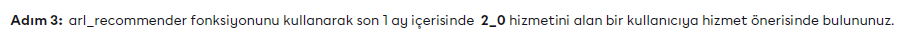

In [ ]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

In [ ]:
df['New_Date'].max()

'2018-08'

In [ ]:
arl_recommender(rules,'2_0', 1)

['22_0']